<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data 
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

<a id="item41"></a>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [1]:
# !wget  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

In [2]:
# !unzip concrete_data_week4.zip

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

<a id="item42"></a>

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [3]:
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Batch, Image Size, Classes Defnition:

#### Note: Since, a batch size of 100 was too much for my computer, I have used a batch size of 10 for both Resnet50 and VGG16

In [4]:
batch_train = 10
batch_valid = 10
image_resize =224
num_classes = 2

##### Model

In [5]:
model = Sequential()

##### Datagenerator object

In [6]:
data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

##### Train set

In [7]:
train = data_generator.flow_from_directory('concrete_data_week4/concrete_data_week4/train', 
                                           target_size = (image_resize,image_resize),
                                           batch_size = batch_train,
                                           class_mode = 'categorical')

Found 30001 images belonging to 2 classes.


##### Validation Set

In [8]:
valid = data_generator.flow_from_directory('concrete_data_week4/concrete_data_week4/valid', 
                                           target_size = (image_resize,image_resize),
                                           batch_size = batch_valid,
                                           class_mode = 'categorical')

Found 9501 images belonging to 2 classes.


##### Neural Network Lavers for VGG16

In [ ]:
model.add(VGG16(include_top = False,input_shape=(224,224,3), pooling='avg',weights ='imagenet')) # VGG16
model.layers[0].trainable = False         # Set Pertrained to false
model.add(Dense(256,activation='relu'))   # Add another layer for Accuracy
model.add(Dropout(0.50))                  # To Avoid Ovefitting

##### Last Layer

In [ ]:
model.add(Dense(num_classes, activation = 'softmax'))

##### Compile

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

##### Defnitions for fit_generator method

In [ ]:
steps_per_epoch_train = len(train)
steps_per_epoch_valid = len(valid)
num_epochs =2

##### fit_generator Method

In [ ]:
fit_vgg16 = model.fit_generator(train, epochs = num_epochs, steps_per_epoch = steps_per_epoch_train,  
                           validation_data = valid, validation_steps = steps_per_epoch_valid,
                           verbose =1)

##### Save Model

In [ ]:
tf.keras.models.save_model( model, "VGG16_Model.model", overwrite=True, include_optimizer=True) 

# -------------------------------------------------------------------------------------------------------------

<a id="item43"></a>

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

##### Importing for Resnet50 

In [9]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet

##### Load Resnet50 Model

In [10]:
model_resnet = tf.keras.models.load_model('classifier_resnet_model.model')

##### Load VGG16 Model

In [11]:
model = tf.keras.models.load_model('VGG16_Model.model')

##### Summary of VGG16 Model

In [46]:
model.summary()  # Summary of VGG16 Model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 14,846,530
Trainable params: 131,842
Non-trainable params: 14,714,688
_________________________________________________________________


##### Datagenerator for Resnet50

In [12]:
data_generator_resnet = ImageDataGenerator(preprocessing_function=preprocess_input_resnet,)

##### Test Set with shuffle set to True since in a computer files get sorted

In [13]:
test_vgg = data_generator.flow_from_directory('concrete_data_week4/concrete_data_week4/test',
                                                 target_size = (image_resize,image_resize), 
                                                  batch_size =10,
                                                  shuffle = True)           # VGG16 Model

Found 500 images belonging to 2 classes.


In [14]:
test_res = data_generator_resnet.flow_from_directory('concrete_data_week4/concrete_data_week4/test',
                                                 target_size = (image_resize,image_resize), 
                                                  batch_size =10,
                                                  shuffle = True)         # ResNet 50 Model

Found 500 images belonging to 2 classes.


##### evaluate_generator method for Resnet50

In [15]:
eval_resnet = model_resnet.evaluate_generator(test_res, verbose = 1)

C:\Users\Shravan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


50/50 [==============================] - 104s 2s/step - loss: 0.0113 - accuracy: 0.9960


##### evaluate_generator method for VGG16:

In [16]:
eval_vgg = model.evaluate_generator(test_vgg, verbose = 1)

50/50 [==============================] - 180s 4s/step - loss: 0.0029 - accuracy: 0.9980


##### Print both models accuracy

In [20]:
print('Performance VGG16: ', eval_vgg[1])
print('Performance RESNET50: ', eval_resnet[1])

Performance VGG16:  0.9980000257492065
Performance RESNET50:  0.9959999918937683


# -------------------------------------------------------------------------------------------------------------

<a id="item44"></a>

## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

##### A method to extract the filenames as we set 'shuffle=True'. This method is helpful to Visualise the images.

In [21]:
def get_indices_filenames(set_, batch_size):
    
    idx_left = (set_.batch_index - 1) * batch_size   # Get the left index of list 

    idx_right = idx_left + set_.batch_size if idx_left >= 0 else None # Get the right index of list

    indices = set_.index_array[idx_left:idx_right]    # Slice the list of the batches to get indices
    filenames = [set_.filenames[i] for i in indices]  # Get file names of respective indices
    return indices, filenames

##### Filenames Extractor

In [23]:
i=0  # Loop Breaker
l_vgg=[] # List with Filenames
for x, y in test_vgg:
    indices, filenames = get_indices_filenames(test_vgg,10)  # Call the Above function
    l_vgg.append(filenames)                                   # Append the filenames
    i+=1                                                  # Increment the count
    if i==50:                                             # break the loop since this loop is infinite
        break # Since our batch size is 10 and total images (test set) is 500, so 10*50=500, so 50 is used
l_vgg[0:2]

[['positive\\19949.jpg',
  'negative\\19915.jpg',
  'positive\\19868.jpg',
  'positive\\19936.jpg',
  'negative\\19811.jpg',
  'negative\\19994.jpg',
  'positive\\19878.jpg',
  'positive\\19932.jpg',
  'positive\\19837.jpg',
  'positive\\19842.jpg'],
 ['positive\\19765.jpg',
  'negative\\19803.jpg',
  'positive\\19996.jpg',
  'positive\\19960.jpg',
  'negative\\19896.jpg',
  'positive\\19903.jpg',
  'positive\\19830.jpg',
  'positive\\19898.jpg',
  'positive\\19961.jpg',
  'positive\\19908.jpg']]

In [24]:
i=0  # Loop Breaker
l_res=[] # List with Filenames
for x, y in test_res:
    indices, filenames = get_indices_filenames(test_res,10)  # Call the Above function
    l_res.append(filenames)                                   # Append the filenames
    i+=1                                                  # Increment the count
    if i==50:                                             # break the loop since this loop is infinite
        break # Since our batch size is 10 and total images (test set) is 500, so 10*50=500, so 50 is used
l_res

[['negative\\19847.jpg',
  'negative\\19865.jpg',
  'positive\\19993.jpg',
  'negative\\19827.jpg',
  'negative\\19996.jpg',
  'negative\\19807.jpg',
  'positive\\19792.jpg',
  'negative\\19970.jpg',
  'positive\\19819.jpg',
  'positive\\19877.jpg'],
 ['negative\\19803.jpg',
  'negative\\19978.jpg',
  'positive\\19780.jpg',
  'positive\\19920.jpg',
  'negative\\19782.jpg',
  'negative\\19862.jpg',
  'negative\\19839.jpg',
  'positive\\19965.jpg',
  'negative\\19991.jpg',
  'positive\\19797.jpg'],
 ['negative\\19840.jpg',
  'positive\\19906.jpg',
  'positive\\19836.jpg',
  'negative\\19820.jpg',
  'negative\\19781.jpg',
  'positive\\19891.jpg',
  'positive\\19841.jpg',
  'positive\\19765.jpg',
  'positive\\19901.jpg',
  'positive\\19933.jpg'],
 ['negative\\19934.jpg',
  'positive\\19929.jpg',
  'positive\\19847.jpg',
  'negative\\19773.jpg',
  'positive\\19962.jpg',
  'negative\\19975.jpg',
  'positive\\19915.jpg',
  'positive\\19813.jpg',
  'negative\\19920.jpg',
  'negative\\19809.jpg

##### The above process has list within lists, therefoe loop to break and combine to one single list

In [25]:
# For VGG 16
li_vgg=[]
for i in range(len(l_vgg)):  # Major list
    for j in l_vgg[i]:       # Minor list
        li_vgg.append(j)     # Append to list

In [26]:
# For ResNet 50
li_res=[]
for i in range(len(l_res)):  # Major list
    for j in l_res[i]:       # Minor list
        li_res.append(j)     # Append to list

##### Predict Resnet50 Model using predict_generator method

In [27]:
predict_resnet = model_resnet.predict_generator(test_res,verbose =1)

C:\Users\Shravan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


50/50 [==============================] - 108s 2s/step


##### Predict VGG16 Model using predict_generator method

In [28]:
predict_vgg = model.predict_generator(test_vgg, verbose =1)

50/50 [==============================] - 204s 4s/step


##### Get the predicted Class Indices 

##### For VGG Model

In [29]:
predicted_class_indices_vgg=np.argmax(predict_vgg,axis=1)
predicted_class_indices_vgg

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,

##### For Resnet50 Model

In [30]:
predicted_class_indices_res=np.argmax(predict_resnet,axis=1)
predicted_class_indices_res

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,

#### Get labels from test.class_indices

In [31]:
# For VGG 16
labels_vgg = (test_vgg.class_indices)
labels_vgg

{'negative': 0, 'positive': 1}

In [32]:
# For ResNet 50
labels_res = (test_res.class_indices)
labels_res

{'negative': 0, 'positive': 1}

##### Reverse the key and values

In [33]:
# For VGG 16
labels_vgg = dict((v,k) for k,v in labels_vgg.items())
labels_vgg

{0: 'negative', 1: 'positive'}

In [34]:
# For ResNet 50
labels_res = dict((v,k) for k,v in labels_res.items())
labels_res

{0: 'negative', 1: 'positive'}

##### Get predictions using labels and predicted class indices

##### For VGG16

In [36]:
predictions_vgg = [labels_vgg[k] for k in predicted_class_indices_vgg]
predictions_vgg

['positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',

##### For Resnet50 Model

In [37]:
predictions_res = [labels_res[k] for k in predicted_class_indices_res]
predictions_res

['negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',

##### Construct a Dataframe with Filenames and Predictions

##### VGG Dataframe

In [39]:
results_vgg=pd.DataFrame({"Filename":li_vgg,
                      "Predictions":predictions_vgg})
results_vgg.head(10)

,Filename,Predictions
0,positive\19949.jpg,positive
1,negative\19915.jpg,negative
2,positive\19868.jpg,positive
3,positive\19936.jpg,positive
4,negative\19811.jpg,negative
5,negative\19994.jpg,negative
6,positive\19878.jpg,positive
7,positive\19932.jpg,positive
8,positive\19837.jpg,positive
9,positive\19842.jpg,positive


##### RESNET Dataframe

In [40]:
results_res=pd.DataFrame({"Filename":li_res,
                      "Predictions":predictions_res})
results_res.head(10)

,Filename,Predictions
0,negative\19847.jpg,negative
1,negative\19865.jpg,negative
2,positive\19993.jpg,positive
3,negative\19827.jpg,negative
4,negative\19996.jpg,negative
5,negative\19807.jpg,negative
6,positive\19792.jpg,positive
7,negative\19970.jpg,negative
8,positive\19819.jpg,positive
9,positive\19877.jpg,positive


##### VGG16 Model predictions

In [41]:
i=0
while i<=4:
    print(results_vgg['Predictions'][i])
    i+=1

positive
negative
positive
positive
negative


##### ResNet50 Model Predictions

In [42]:
i=0
while i<=4:
    print(results_res['Predictions'][i])
    i+=1

negative
negative
positive
negative
negative


##### First Five predictions for VGG16 Model for first 5 images

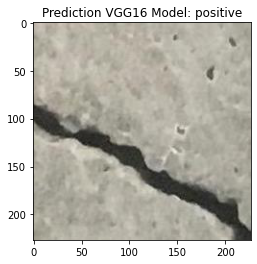

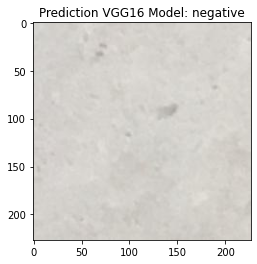

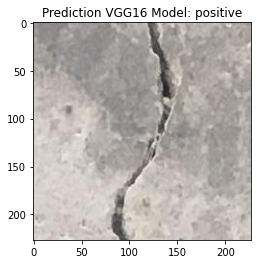

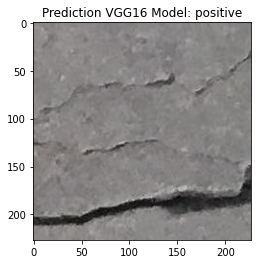

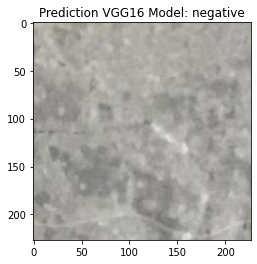

In [44]:
k=0                                                                     # Iterator to break loop
for i,j in zip(results_vgg['Filename'], results_vgg['Predictions']):
    
    im_data= plt.imread('concrete_data_week4/concrete_data_week4/test/' + i) # Image data
    plt.imshow(im_data)                                                      # Show image
    plt.title(f'Prediction VGG16 Model: {j}')           # Title 
    plt.show()                                                               # Show
    
    k+=1                                       # Increment By 1
    if k==5:                                   # Break loop when k = 5
        break                                  # Break

##### First Five predictions for Resnet 50 Model for first 5 images

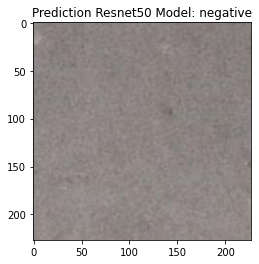

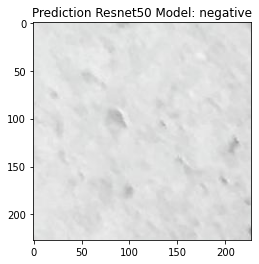

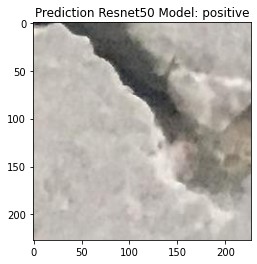

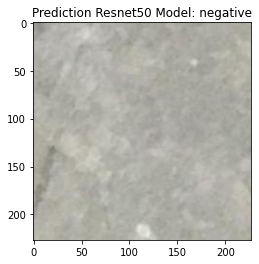

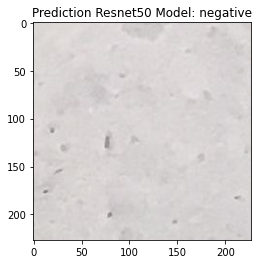

In [45]:
k=0                                                                     # Iterator to break loop
for i,j in zip(results_res['Filename'], results_res['Predictions']):
    
    im_data= plt.imread('concrete_data_week4/concrete_data_week4/test/' + i) # Image data
    plt.imshow(im_data)                                                      # Show image
    plt.title(f'Prediction Resnet50 Model: {j}')           # Title 
    plt.show()                                                               # Show
    
    k+=1                                       # Increment By 1
    if k==5:                                   # Break loop when k = 5
        break  

# -------------------------------------------------------------------------------------------------------------

### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).